## GROUP 2 :  - Casestudy2 - Predicting the Sales of Fortified Wine

The 'australianwine.csv' contains the monthly sales of 6 types of wines in a super market. Fortified wine has the largest market share and the super market owner feels that the sales of other wine types impacts the sale of fortified wine.


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("./data/AustralianWines.csv",parse_dates=['Month'])
data.head(5)

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
0,1980-01-01,2585,464,112,1686,85,1954
1,1980-02-01,3368,675,118,1591,89,2302
2,1980-03-01,3210,703,129,2304,109,3054
3,1980-04-01,3111,887,99,1712,95,2414
4,1980-05-01,3756,1139,116,1471,91,2226


In [5]:
df=data.drop(['Red ', 'Rose ', 'sparkling ', 'Sweet white',
       'Dry white'],axis=1)
df.head()

,Month,Fortified
0,1980-01-01,2585
1,1980-02-01,3368
2,1980-03-01,3210
3,1980-04-01,3111
4,1980-05-01,3756


# Decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

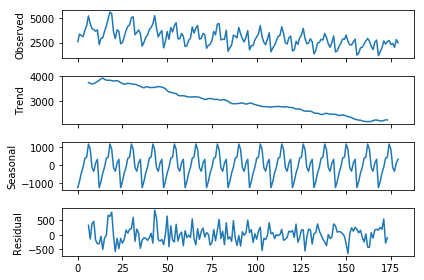

In [7]:
decomp = seasonal_decompose(df.Fortified, model="additive", freq=12)
decomp.plot()
plt.show()

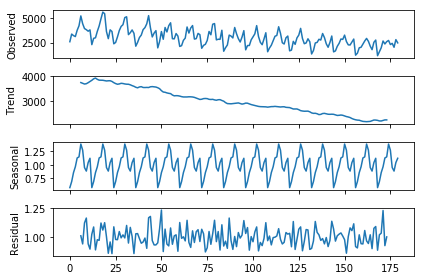

In [9]:
decomp = seasonal_decompose(df.Fortified, model="multiplicative", freq=12)
decomp.plot()
plt.show()

It has a negative trend. Seasonality is observed

In [10]:
#Create a date range
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(data))
dates[0:5]

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [11]:
dates.month[0:5]

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [12]:
#Create a new column for month and use the month from the created date range
import calendar
df['Month_names'] = dates.month
df.head()

,Month,Fortified,Month_names
0,1980-01-01,2585,1
1,1980-02-01,3368,2
2,1980-03-01,3210,3
3,1980-04-01,3111,4
4,1980-05-01,3756,5


In [13]:
#Rename the numbers in the Month column to calendar months
df['Month_names'] = df['Month_names'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Month,Fortified,Month_names
0,1980-01-01,2585,Jan
1,1980-02-01,3368,Feb
2,1980-03-01,3210,Mar
3,1980-04-01,3111,Apr
4,1980-05-01,3756,May


In [14]:
#Create a new column for year and use the year from the created date range
df['Year'] = dates.year
df.head()

,Month,Fortified,Month_names,Year
0,1980-01-01,2585,Jan,1980
1,1980-02-01,3368,Feb,1980
2,1980-03-01,3210,Mar,1980
3,1980-04-01,3111,Apr,1980
4,1980-05-01,3756,May,1980


In [15]:
df.drop(['Month'], axis=1, inplace=True)
df.head()

,Fortified,Month_names,Year
0,2585,Jan,1980
1,3368,Feb,1980
2,3210,Mar,1980
3,3111,Apr,1980
4,3756,May,1980


In [16]:
df.index = dates
df = df[['Fortified']]
df.head()

,Fortified
1980-01-01,2585
1980-02-01,3368
1980-03-01,3210
1980-04-01,3111
1980-05-01,3756


In [17]:
df.shape

(180, 1)

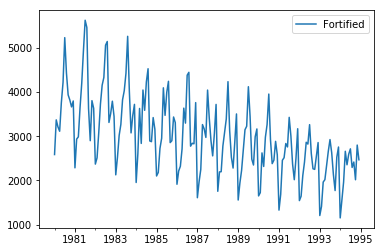

In [18]:
df.plot()

In [19]:
wine=data[['Red ', 'Rose ', 'sparkling ', 'Sweet white','Dry white']]
wine.index= dates
wine.head()

,Red,Rose,sparkling,Sweet white,Dry white
1980-01-01,464,112,1686,85,1954
1980-02-01,675,118,1591,89,2302
1980-03-01,703,129,2304,109,3054
1980-04-01,887,99,1712,95,2414
1980-05-01,1139,116,1471,91,2226


<Figure size 1800x1440 with 0 Axes>

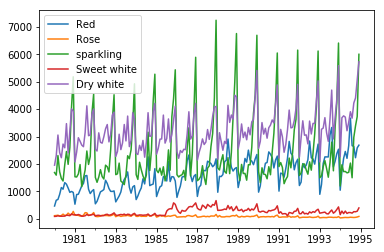

In [20]:
plt.figure(figsize=(25,20))
wine.plot()
plt.show()

In [21]:
#Creating train and test set 
train=df[:'1991-12'] 
test=df['1992-01':]

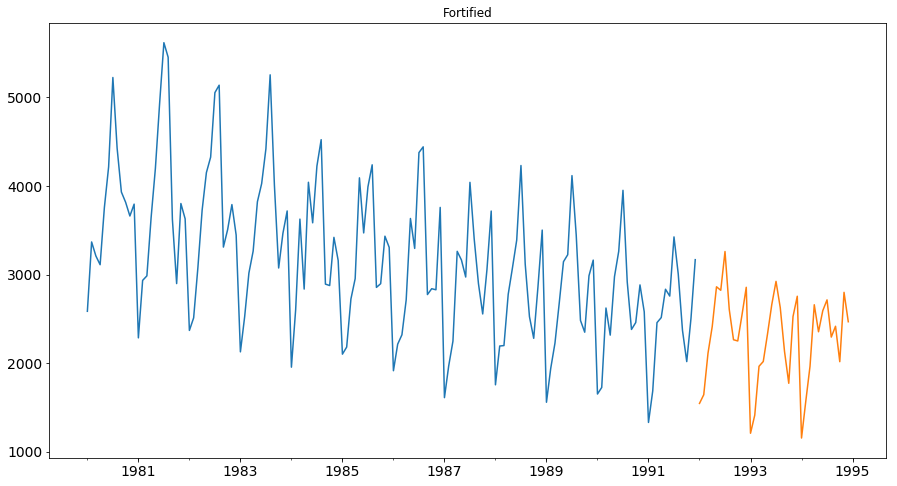

In [22]:
#Plot data
train.Fortified.plot(figsize=(15,8), title= 'Fortified', fontsize=14)
test.Fortified.plot(figsize=(15,8), title= 'Fortified', fontsize=14)

# Regression on time

In [23]:
time = [i+1 for i in range(len(df))]

In [24]:
df1 = df.copy()
df1['time'] = time

In [25]:
df1.head()

,Fortified,time
1980-01-01,2585,1
1980-02-01,3368,2
1980-03-01,3210,3
1980-04-01,3111,4
1980-05-01,3756,5


In [26]:
#Creating train and test set 
train=df1[:'1991-12'] 
test=df1['1992-01':]

In [27]:
x_train = train.drop('Fortified', axis=1)
x_test = test.drop('Fortified', axis=1)
y_train = train[['Fortified']]
y_test = test[['Fortified']]

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
predictions = model.predict(x_test)

In [31]:
y_test['RegOnTime'] = predictions

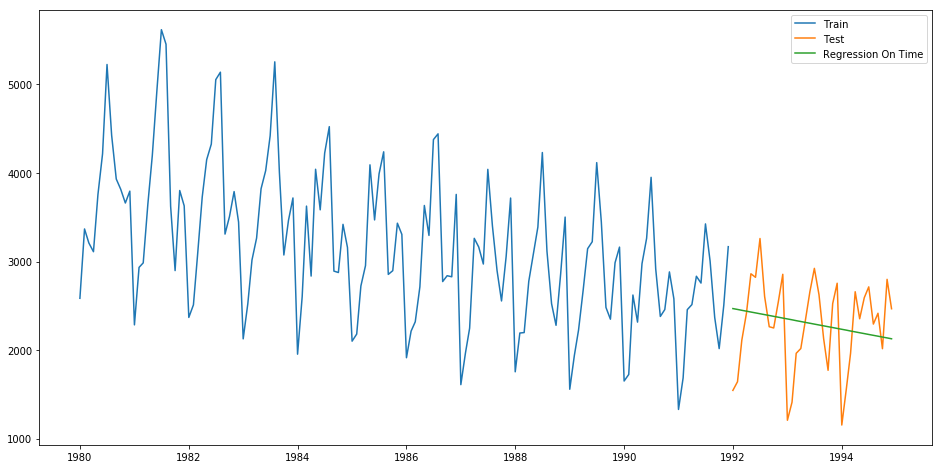

In [32]:
plt.figure(figsize=(16,8))
plt.plot( train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [33]:
rmse = np.sqrt(mean_squared_error(test.Fortified, y_test.RegOnTime))
rmse = round(rmse, 3)
rmse

518.921

In [34]:
abs_error = np.abs(y_test['Fortified']-y_test['RegOnTime'])
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.222

In [35]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.222


# Naive Forecast

In [36]:
dd= np.asarray(train.Fortified)
dd

array([2585, 3368, 3210, 3111, 3756, 4216, 5225, 4426, 3932, 3816, 3661,
       3795, 2285, 2934, 2985, 3646, 4198, 4935, 5618, 5454, 3624, 2898,
       3802, 3629, 2369, 2511, 3079, 3728, 4151, 4326, 5054, 5138, 3310,
       3508, 3790, 3446, 2127, 2523, 3017, 3265, 3822, 4027, 4420, 5255,
       4009, 3074, 3465, 3718, 1954, 2604, 3626, 2836, 4042, 3584, 4225,
       4523, 2892, 2876, 3420, 3159, 2101, 2181, 2724, 2954, 4092, 3470,
       3990, 4239, 2855, 2897, 3433, 3307, 1914, 2214, 2320, 2714, 3633,
       3295, 4377, 4442, 2774, 2840, 2828, 3758, 1610, 1968, 2248, 3262,
       3164, 2972, 4041, 3402, 2898, 2555, 3056, 3717, 1755, 2193, 2198,
       2777, 3076, 3389, 4231, 3118, 2524, 2280, 2862, 3502, 1558, 1940,
       2226, 2676, 3145, 3224, 4117, 3446, 2482, 2349, 2986, 3163, 1651,
       1725, 2622, 2316, 2976, 3263, 3951, 2917, 2380, 2458, 2883, 2579,
       1330, 1686, 2457, 2514, 2834, 2757, 3425, 3006, 2369, 2017, 2507,
       3168], dtype=int64)

In [37]:
y_hat = test.copy()

In [38]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

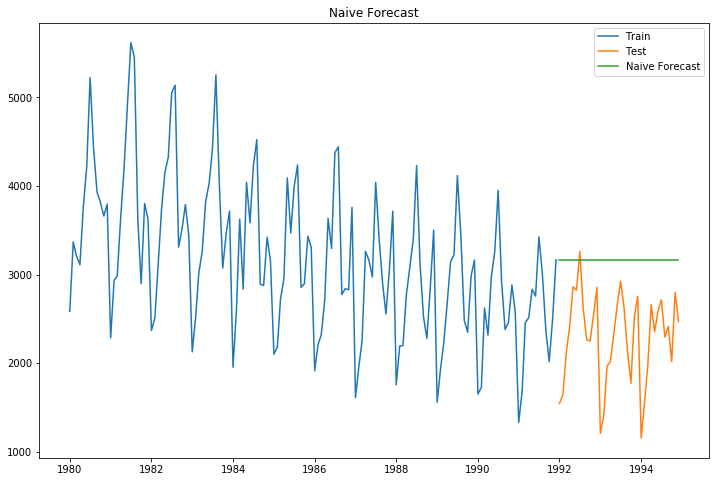

In [39]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Fortified'], label='Train')
plt.plot(test.index,test['Fortified'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [40]:
#RMSE Calculation
rmse = np.sqrt(mean_squared_error(test.Fortified, y_hat.naive))
rmse = round(rmse, 3)
rmse

1010.361

In [41]:
abs_error = np.abs(y_test['Fortified']-y_hat.naive)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4716

In [42]:
tempResultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.2220
0,Naive forecast,1010.361,0.4716


# Simple Average

In [43]:
yhat_avg = test.copy()

In [45]:
yhat_avg['avg_forecast'] = train['Fortified'].mean()

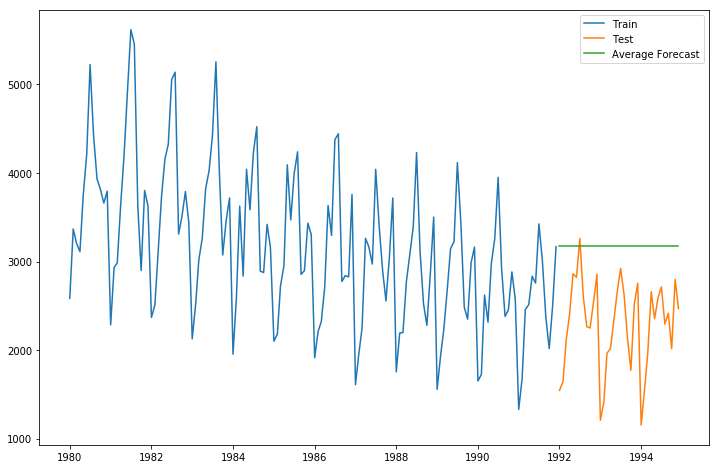

In [46]:
plt.figure(figsize=(12,8))
plt.plot(train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(yhat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [48]:
rmse = np.sqrt(mean_squared_error(test.Fortified, yhat_avg.avg_forecast))
rmse = round(rmse, 3)
rmse

1016.649

In [49]:
abs_error = np.abs(y_test['Fortified']-yhat_avg.avg_forecast)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4748

In [50]:
tempResultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.2220
0,Naive forecast,1010.361,0.4716
0,Simple average forecast,1016.649,0.4748


# Moving Average

In [52]:
df1 = df.copy()

In [53]:
df1['moving_avg_forecast'] = df['Fortified'].rolling(12).mean()

In [54]:
df1.tail(2)

,Fortified,moving_avg_forecast
1994-11-01,2799,2273.833333
1994-12-01,2467,2249.833333


In [55]:
#Creating train and test set 
train=df1[:'1991-12'] 
test=df1['1992-01':]

In [56]:
yhat_avg = test.copy()

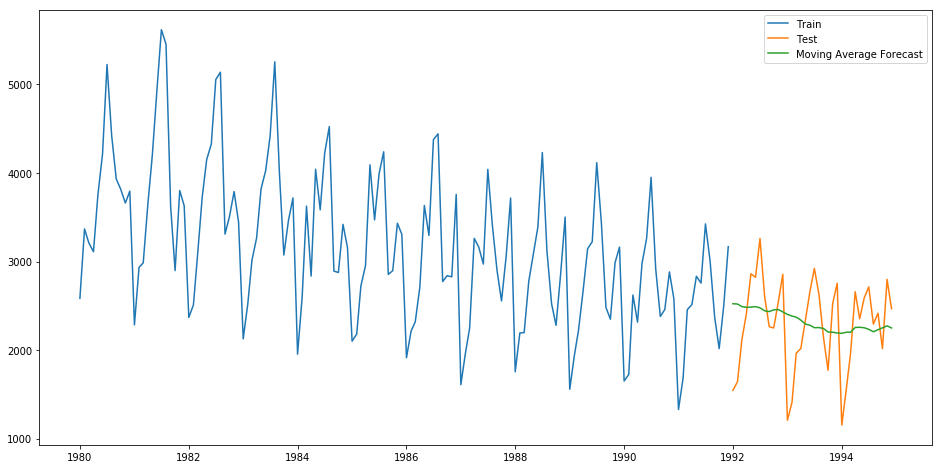

In [57]:
plt.figure(figsize=(16,8))
plt.plot(train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(yhat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [59]:
rmse = np.sqrt(mean_squared_error(test.Fortified, yhat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

513.364

In [60]:
abs_error = np.abs(y_test['Fortified']-yhat_avg.moving_avg_forecast)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2196

In [61]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.2220
0,Naive forecast,1010.361,0.4716
0,Simple average forecast,1016.649,0.4748
0,Moving average forecast,513.364,0.2196


# Simple Exponential Smoothing

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [63]:
# create class
model = SimpleExpSmoothing(train['Fortified'])

In [75]:
# fit model
model_fit = model.fit(smoothing_level=0.1,optimized=False)
model_fit.params

{'smoothing_level': 0.1,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 2585.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
yhat_avg = test.copy()

In [77]:
yhat_avg['SES'] = model_fit.forecast(len(test['Fortified']))

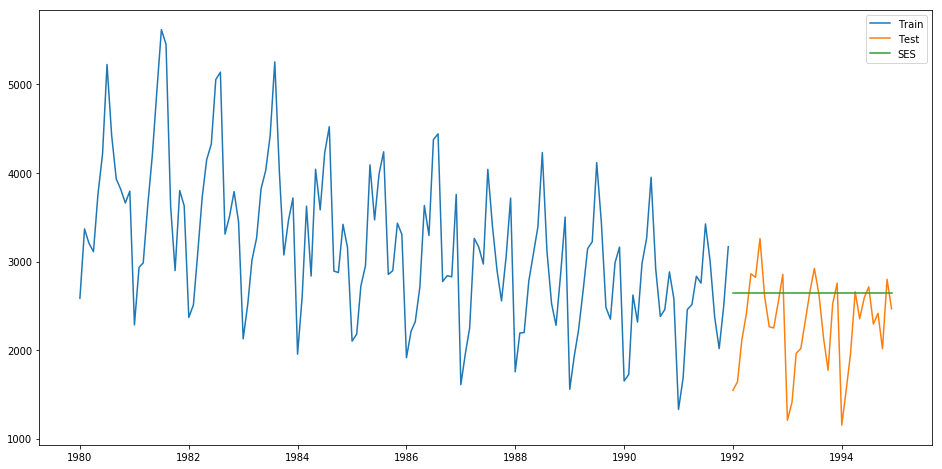

In [78]:
plt.figure(figsize=(16,8))
plt.plot(train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(yhat_avg['SES'], label='SES')
plt.legend(loc='best')

In [79]:
rmse = np.sqrt(mean_squared_error(test.Fortified, yhat_avg.SES))
rmse = round(rmse, 3)

abs_error = np.abs(y_test['Fortified']-yhat_avg.SES)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2621

In [80]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.2220
0,Naive forecast,1010.361,0.4716
0,Simple average forecast,1016.649,0.4748
0,Moving average forecast,513.364,0.2196
0,SES forecast,614.396,0.2621


# Holts Method

In [81]:
fit1 = ExponentialSmoothing(np.asarray(train['Fortified']) ,seasonal_periods=12 ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.7953878943907668,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1815.597502948731,
 'initial_slope': 11.448003397892638,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
yhat_avg['Holt'] = fit1.forecast(len(test))

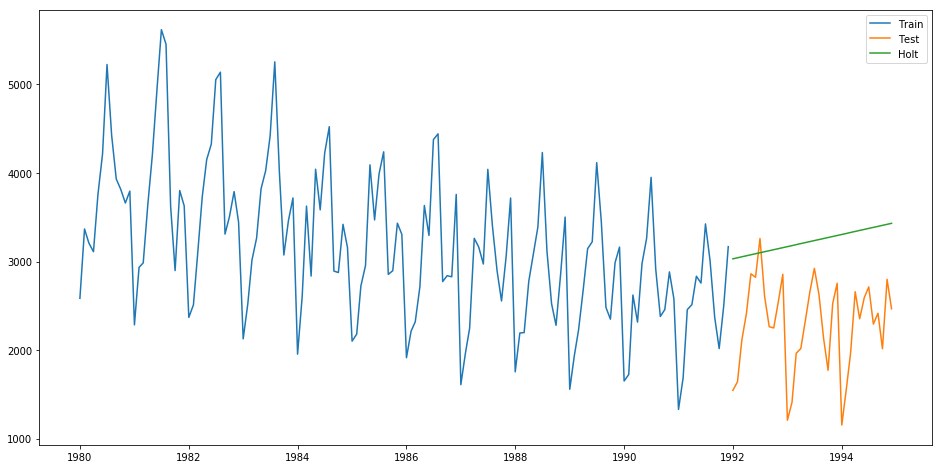

In [83]:
plt.figure(figsize=(16,8))
plt.plot( train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(yhat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [84]:
rmse = np.sqrt(mean_squared_error(test.Fortified, yhat_avg.Holt))
rmse = round(rmse, 3)
rmse

1068.976

In [85]:
abs_error = np.abs(y_test['Fortified']-yhat_avg.Holt)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.5008

In [86]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.2220
0,Naive forecast,1010.361,0.4716
0,Simple average forecast,1016.649,0.4748
0,Moving average forecast,513.364,0.2196
0,SES forecast,614.396,0.2621
0,Holt,1068.976,0.5008


# Holts Winters-Additive

In [87]:
y_hat_avg = test.copy()

In [88]:
fit1 = ExponentialSmoothing(np.asarray(train['Fortified']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.05721406591349839,
 'smoothing_slope': 0.0572140645712042,
 'smoothing_seasonal': 0.4789534839726805,
 'damping_slope': nan,
 'initial_level': 2020.399680703783,
 'initial_slope': 5.859618506349482,
 'initial_seasons': array([ 630.58191468, 1389.66392494, 1272.45680659, 1225.67686257,
        1862.02540748, 2317.71911689, 3297.74256016, 2569.39401149,
        1968.15221892, 1824.93968412, 1739.24216289, 1848.18276395]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [89]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

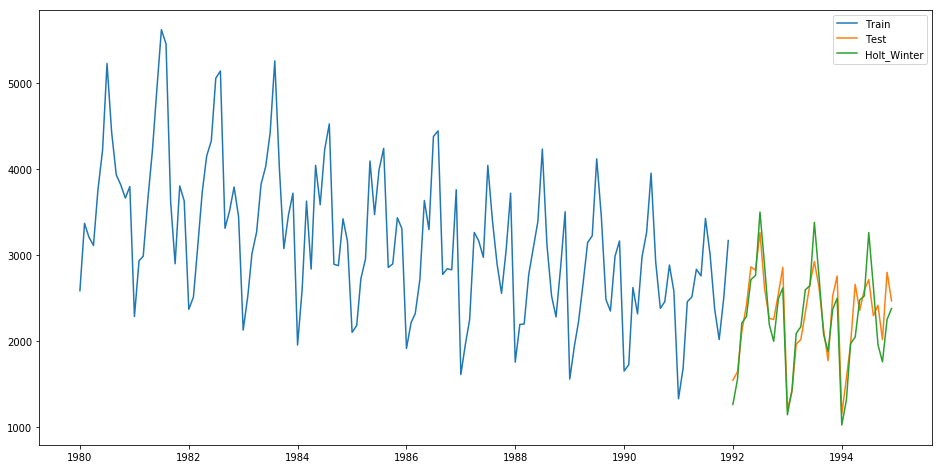

In [90]:
plt.figure(figsize=(16,8))
plt.plot( train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [91]:
rmse = np.sqrt(mean_squared_error(test.Fortified, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

253.434

In [92]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.Holt_Winter)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0858

In [93]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.2220
0,Naive forecast,1010.361,0.4716
0,Simple average forecast,1016.649,0.4748
0,Moving average forecast,513.364,0.2196
0,SES forecast,614.396,0.2621
0,Holt,1068.976,0.5008
0,Holt Winter forecast - Additive,253.434,0.0858


# Holt Winters-Multiplicative

In [94]:
fit1 = ExponentialSmoothing(np.asarray(train['Fortified']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.07527711432614799,
 'smoothing_slope': 0.07527710401927469,
 'smoothing_seasonal': 0.39972187579097535,
 'damping_slope': nan,
 'initial_level': 1936.5833409939014,
 'initial_slope': 6.298030009906139,
 'initial_seasons': array([1.27095911, 1.5711818 , 1.65113712, 1.74972505, 2.05830016,
        2.24339268, 2.65417493, 2.5190353 , 1.89807758, 1.75805601,
        1.91215105, 1.90049264]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

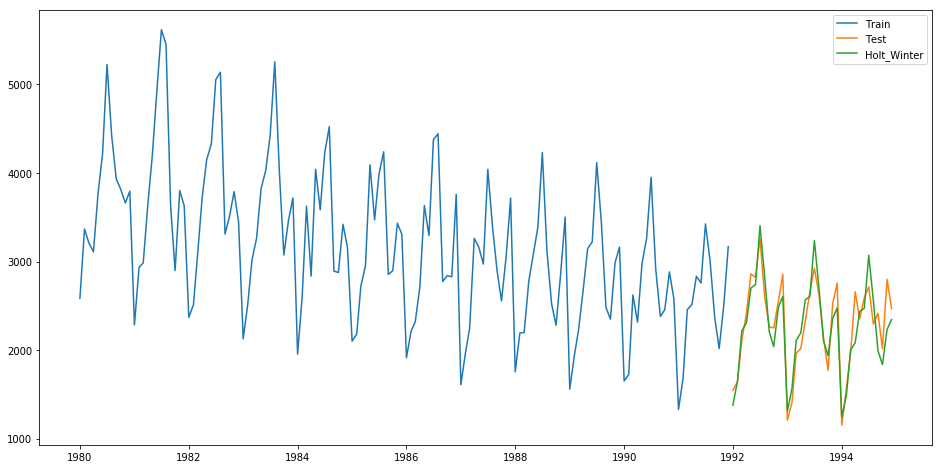

In [96]:
plt.figure(figsize=(16,8))
plt.plot( train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [97]:
rmse = np.sqrt(mean_squared_error(test.Fortified, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

221.911

In [98]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.Holt_Winter)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0766

In [99]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,518.921,0.2220
0,Naive forecast,1010.361,0.4716
0,Simple average forecast,1016.649,0.4748
0,Moving average forecast,513.364,0.2196
0,SES forecast,614.396,0.2621
0,Holt,1068.976,0.5008
0,Holt Winter forecast - Additive,253.434,0.0858
0,Holt Winter forecast - Mult,221.911,0.0766


# Till here we can say that Holt winters add or mul both are good models and any one of them can be used

# Auto-Regression

In [101]:
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas.tools.plotting import lag_plot
from statsmodels.tsa.ar_model import AR
from math import sqrt

In [102]:
data = pd.read_csv('./data/AustralianWines.csv', header=0)
data.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
0,Jan-80,2585,464,112,1686,85,1954
1,Feb-80,3368,675,118,1591,89,2302
2,Mar-80,3210,703,129,2304,109,3054
3,Apr-80,3111,887,99,1712,95,2414
4,May-80,3756,1139,116,1471,91,2226


In [103]:
data.columns

Index(['Month', 'Fortified', 'Red ', 'Rose ', 'sparkling ', 'Sweet white',
       'Dry white'],
      dtype='object')

In [104]:
data.drop(['Red ', 'Rose ', 'sparkling ', 'Sweet white',
       'Dry white'],axis=1,inplace=True)

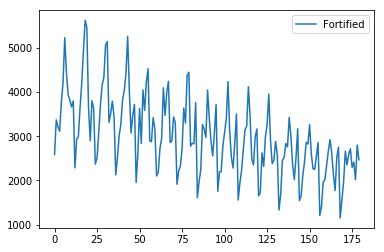

In [105]:
data.plot()

In [106]:
#Creating a lagged series
data.shift(1).head()

,Month,Fortified
0,NaN,NaN
1,Jan-80,2585.0
2,Feb-80,3368.0
3,Mar-80,3210.0
4,Apr-80,3111.0


In [107]:
#Add the lagged series to the original dataframe
data1 = concat([data, data.shift(1) , data.shift(2), data.shift(3), data.shift(4)], axis=1)

In [108]:
data1.head(5)

,Month,Fortified,Month,Fortified,Month,Fortified,Month,Fortified,Month,Fortified
0,Jan-80,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-80,3368,Jan-80,2585.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-80,3210,Feb-80,3368.0,Jan-80,2585.0,NaN,NaN,NaN,NaN
3,Apr-80,3111,Mar-80,3210.0,Feb-80,3368.0,Jan-80,2585.0,NaN,NaN
4,May-80,3756,Apr-80,3111.0,Mar-80,3210.0,Feb-80,3368.0,Jan-80,2585.0


In [109]:
#Name the columns
data1.columns = ['month', 'Fortified', 'month+1', 'Fortified+1', 'month+2', 'Fortified+2',
                 'month+3', 'Fortified+3', 'month+4', 'Fortified+4']

In [110]:
data1.head(5)

,month,Fortified,month+1,Fortified+1,month+2,Fortified+2,month+3,Fortified+3,month+4,Fortified+4
0,Jan-80,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-80,3368,Jan-80,2585.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-80,3210,Feb-80,3368.0,Jan-80,2585.0,NaN,NaN,NaN,NaN
3,Apr-80,3111,Mar-80,3210.0,Feb-80,3368.0,Jan-80,2585.0,NaN,NaN
4,May-80,3756,Apr-80,3111.0,Mar-80,3210.0,Feb-80,3368.0,Jan-80,2585.0


In [111]:
#Retain relevant columns
data1 = data1[['Fortified', 'Fortified+1', 'Fortified+2', 'Fortified+3', 'Fortified+4']]

In [112]:
result = data1.corr()
result = np.round(result,2)
corr = result

In [113]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Fortified,Fortified+1,Fortified+2,Fortified+3,Fortified+4
Fortified,1,0.65,0.38,0.3,0.23
Fortified+1,0.65,1,0.65,0.38,0.3
Fortified+2,0.38,0.65,1,0.65,0.38
Fortified+3,0.3,0.38,0.65,1,0.65
Fortified+4,0.23,0.3,0.38,0.65,1


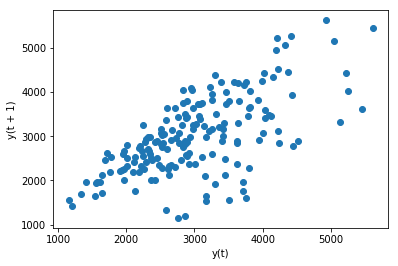

In [114]:
lag_plot(data['Fortified'])

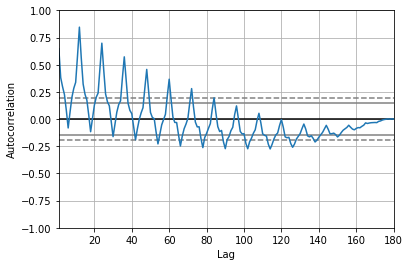

In [115]:
# autocorrelation plot of time series
autocorrelation_plot(data['Fortified'])

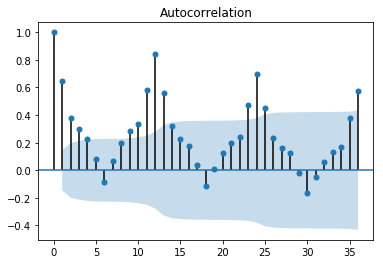

In [116]:
plot_acf(data['Fortified'], lags=36)
plt.show()

# Autoregressive model

In [117]:
data.shape

(180, 2)

In [119]:
# split dataset - use last 3 years for test data
X = data['Fortified']
train, test = X[1:len(X)-24], X[len(X)-24:]

In [120]:
# train autoregression model
model = AR(train)
model_fit = model.fit()

In [121]:
#How many lags considered statistically, what are their beta values

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 13
Coefficients: const           -64.029105
L1.Fortified      0.183081
L2.Fortified     -0.050887
L3.Fortified      0.023383
L4.Fortified     -0.009730
L5.Fortified      0.060247
L6.Fortified     -0.079217
L7.Fortified      0.051680
L8.Fortified     -0.029668
L9.Fortified      0.061937
L10.Fortified    -0.054790
L11.Fortified     0.131242
L12.Fortified     0.763995
L13.Fortified    -0.058911
dtype: float64


In [122]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [123]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions.values[i], test.values[i]))

predicted=1562.849621, expected=1208.000000
predicted=1615.453499, expected=1412.000000
predicted=2040.083578, expected=1964.000000
predicted=2394.341204, expected=2018.000000
predicted=2710.095797, expected=2329.000000
predicted=2687.652660, expected=2660.000000
predicted=3053.581880, expected=2923.000000
predicted=2519.711065, expected=2626.000000
predicted=2207.043193, expected=2132.000000
predicted=2148.120157, expected=1772.000000
predicted=2457.673683, expected=2526.000000
predicted=2618.787715, expected=2755.000000
predicted=1561.815679, expected=1154.000000
predicted=1583.194672, expected=1568.000000
predicted=1973.541205, expected=1965.000000
predicted=2351.603196, expected=2659.000000
predicted=2567.460332, expected=2354.000000
predicted=2560.127308, expected=2592.000000
predicted=2861.308640, expected=2714.000000
predicted=2432.544144, expected=2294.000000
predicted=2138.624784, expected=2416.000000
predicted=2056.076620, expected=2016.000000
predicted=2353.729469, expected=

In [124]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 231.593


In [125]:
abs_error = np.abs(test-predictions)
actual = test
mape = np.round(np.mean(abs_error/actual),3)
mape

0.094

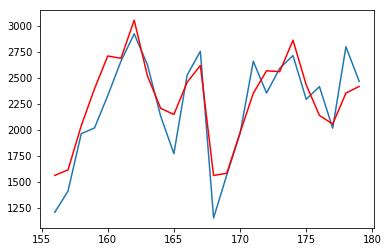

In [126]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# AR also gives a good mape value but slightly more than holt winters.